# Green's Functions in Mathematical Physics

## Introduction

Green's functions are a fundamental tool in mathematical physics and applied mathematics for solving inhomogeneous differential equations subject to boundary conditions. Named after British mathematician George Green (1793-1841), these functions provide a systematic method for constructing solutions to linear differential equations.

## Mathematical Foundation

### Definition

Consider a linear differential operator $\mathcal{L}$ acting on a function $u(x)$. The Green's function $G(x, x')$ is defined as the solution to:

$$\mathcal{L} G(x, x') = \delta(x - x')$$

where $\delta(x - x')$ is the Dirac delta function centered at $x'$.

### Physical Interpretation

The Green's function $G(x, x')$ represents the **response** of the system at point $x$ due to a **unit impulse** applied at point $x'$. This interpretation makes Green's functions invaluable in:

- **Electrostatics**: Response to point charges
- **Heat conduction**: Temperature distribution from point sources
- **Quantum mechanics**: Propagators for particle motion
- **Signal processing**: Impulse response functions

### Solving Inhomogeneous Equations

Given an inhomogeneous equation:

$$\mathcal{L} u(x) = f(x)$$

The solution can be constructed via superposition:

$$u(x) = \int G(x, x') f(x') \, dx'$$

This integral represents the cumulative effect of infinitesimal sources $f(x')$ at each point $x'$.

## Example: One-Dimensional Poisson Equation

Consider the one-dimensional Poisson equation on the interval $[0, L]$ with Dirichlet boundary conditions:

$$\frac{d^2 u}{dx^2} = f(x), \quad u(0) = 0, \quad u(L) = 0$$

### Deriving the Green's Function

The Green's function satisfies:

$$\frac{d^2 G}{dx^2} = \delta(x - x')$$

with $G(0, x') = G(L, x') = 0$.

For $x \neq x'$, the equation becomes $G'' = 0$, yielding linear solutions in each region:

$$G(x, x') = \begin{cases} A x & \text{for } x < x' \\ B(x - L) & \text{for } x > x' \end{cases}$$

Applying continuity at $x = x'$ and the jump condition from integrating the delta function:

$$\left[ \frac{dG}{dx} \right]_{x'} = 1$$

We obtain:

$$G(x, x') = \begin{cases} \frac{x(x' - L)}{L} & \text{for } x \leq x' \\ \frac{x'(x - L)}{L} & \text{for } x > x' \end{cases}$$

This can be written compactly as:

$$G(x, x') = \frac{1}{L} \left[ x_< (x_> - L) \right]$$

where $x_< = \min(x, x')$ and $x_> = \max(x, x')$.

## Computational Implementation

Let us implement and visualize the Green's function for the 1D Poisson equation, then use it to solve a specific problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Set up parameters
L = 1.0  # Domain length [0, L]
N = 200  # Number of grid points

# Create spatial grid
x = np.linspace(0, L, N)

def greens_function(x, xp, L):
    """
    Green's function for the 1D Poisson equation with Dirichlet BCs.
    
    Parameters:
    -----------
    x : float or array
        Observation point(s)
    xp : float
        Source point
    L : float
        Domain length
    
    Returns:
    --------
    G : float or array
        Green's function value(s)
    """
    x = np.atleast_1d(x)
    G = np.zeros_like(x)
    
    # Region where x <= xp
    mask_left = x <= xp
    G[mask_left] = x[mask_left] * (xp - L) / L
    
    # Region where x > xp
    mask_right = x > xp
    G[mask_right] = xp * (x[mask_right] - L) / L
    
    return G

print("Green's function for 1D Poisson equation defined.")
print(f"Domain: [0, {L}]")
print(f"Grid points: {N}")

Green's function for 1D Poisson equation defined.
Domain: [0, 1.0]
Grid points: 200


### Visualizing the Green's Function

Let us plot $G(x, x')$ for several source positions $x'$.

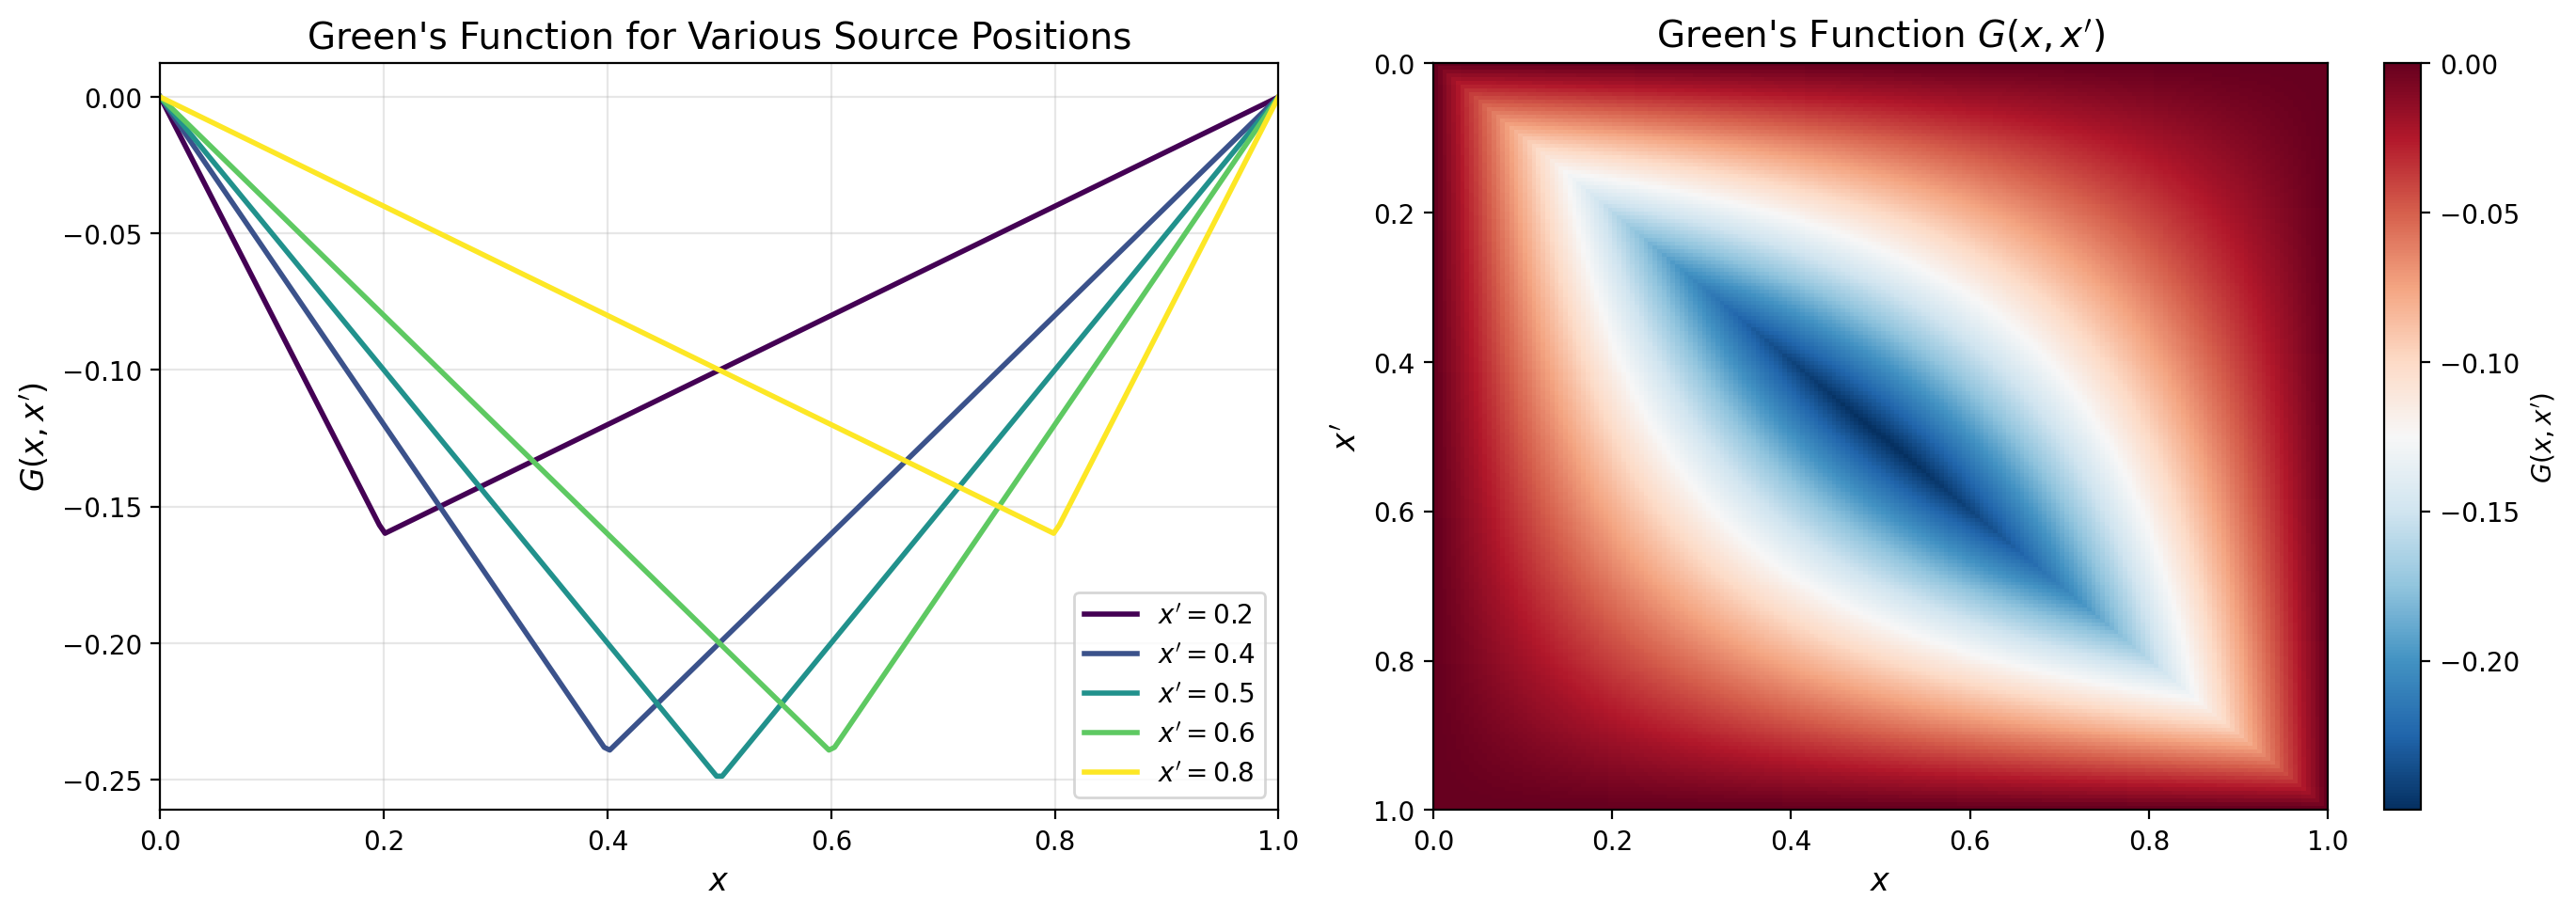

Observation: The Green's function is symmetric: G(x, x') = G(x', x)
This symmetry is a consequence of the self-adjoint nature of the Laplacian operator.


In [2]:
# Plot Green's function for different source positions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left panel: G(x, x') for fixed x' values
ax1 = axes[0]
source_positions = [0.2, 0.4, 0.5, 0.6, 0.8]
colors = plt.cm.viridis(np.linspace(0, 1, len(source_positions)))

for xp, color in zip(source_positions, colors):
    G = greens_function(x, xp, L)
    ax1.plot(x, G, color=color, linewidth=2, label=f"$x' = {xp}$")

ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel("$G(x, x')$", fontsize=12)
ax1.set_title("Green's Function for Various Source Positions", fontsize=14)
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0, L])

# Right panel: 2D heatmap of G(x, x')
ax2 = axes[1]
X, XP = np.meshgrid(x, x)
G_matrix = np.zeros_like(X)

for i, xp_val in enumerate(x):
    G_matrix[i, :] = greens_function(x, xp_val, L)

im = ax2.imshow(G_matrix, extent=[0, L, L, 0], aspect='auto', 
                cmap='RdBu_r', origin='upper')
ax2.set_xlabel('$x$', fontsize=12)
ax2.set_ylabel("$x'$", fontsize=12)
ax2.set_title("Green's Function $G(x, x')$", fontsize=14)
plt.colorbar(im, ax=ax2, label="$G(x, x')$")

plt.tight_layout()
plt.show()

print("Observation: The Green's function is symmetric: G(x, x') = G(x', x)")
print("This symmetry is a consequence of the self-adjoint nature of the Laplacian operator.")

## Solving the Poisson Equation

Now let us use the Green's function to solve a specific problem. Consider:

$$\frac{d^2 u}{dx^2} = f(x) = -\sin(\pi x)$$

with $u(0) = u(1) = 0$.

The analytical solution is:

$$u(x) = \frac{\sin(\pi x)}{\pi^2}$$

We will compute the solution using the Green's function integral:

$$u(x) = \int_0^L G(x, x') f(x') \, dx'$$

In [3]:
def source_function(x):
    """Source term f(x) = -sin(pi*x)"""
    return -np.sin(np.pi * x)

def analytical_solution(x):
    """Exact solution u(x) = sin(pi*x) / pi^2"""
    return np.sin(np.pi * x) / (np.pi**2)

def solve_poisson_greens(x_eval, L, source_func):
    """
    Solve Poisson equation using Green's function method.
    
    Parameters:
    -----------
    x_eval : array
        Points at which to evaluate the solution
    L : float
        Domain length
    source_func : callable
        Source function f(x)
    
    Returns:
    --------
    u : array
        Solution at evaluation points
    """
    u = np.zeros_like(x_eval)
    
    for i, x_pt in enumerate(x_eval):
        # Define integrand: G(x_pt, x') * f(x')
        def integrand(xp):
            G = greens_function(np.array([x_pt]), xp, L)[0]
            return G * source_func(xp)
        
        # Perform numerical integration
        u[i], _ = quad(integrand, 0, L)
    
    return u

# Compute solution
u_numerical = solve_poisson_greens(x, L, source_function)
u_analytical = analytical_solution(x)

# Compute error
error = np.abs(u_numerical - u_analytical)
max_error = np.max(error)
l2_error = np.sqrt(np.trapz(error**2, x))

print(f"Maximum absolute error: {max_error:.2e}")
print(f"L2 error: {l2_error:.2e}")

Maximum absolute error: 1.31e-07
L2 error: 1.37e-08


/tmp/ipykernel_155662/1168096797.py:47: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  l2_error = np.sqrt(np.trapz(error**2, x))


### Comparison of Numerical and Analytical Solutions

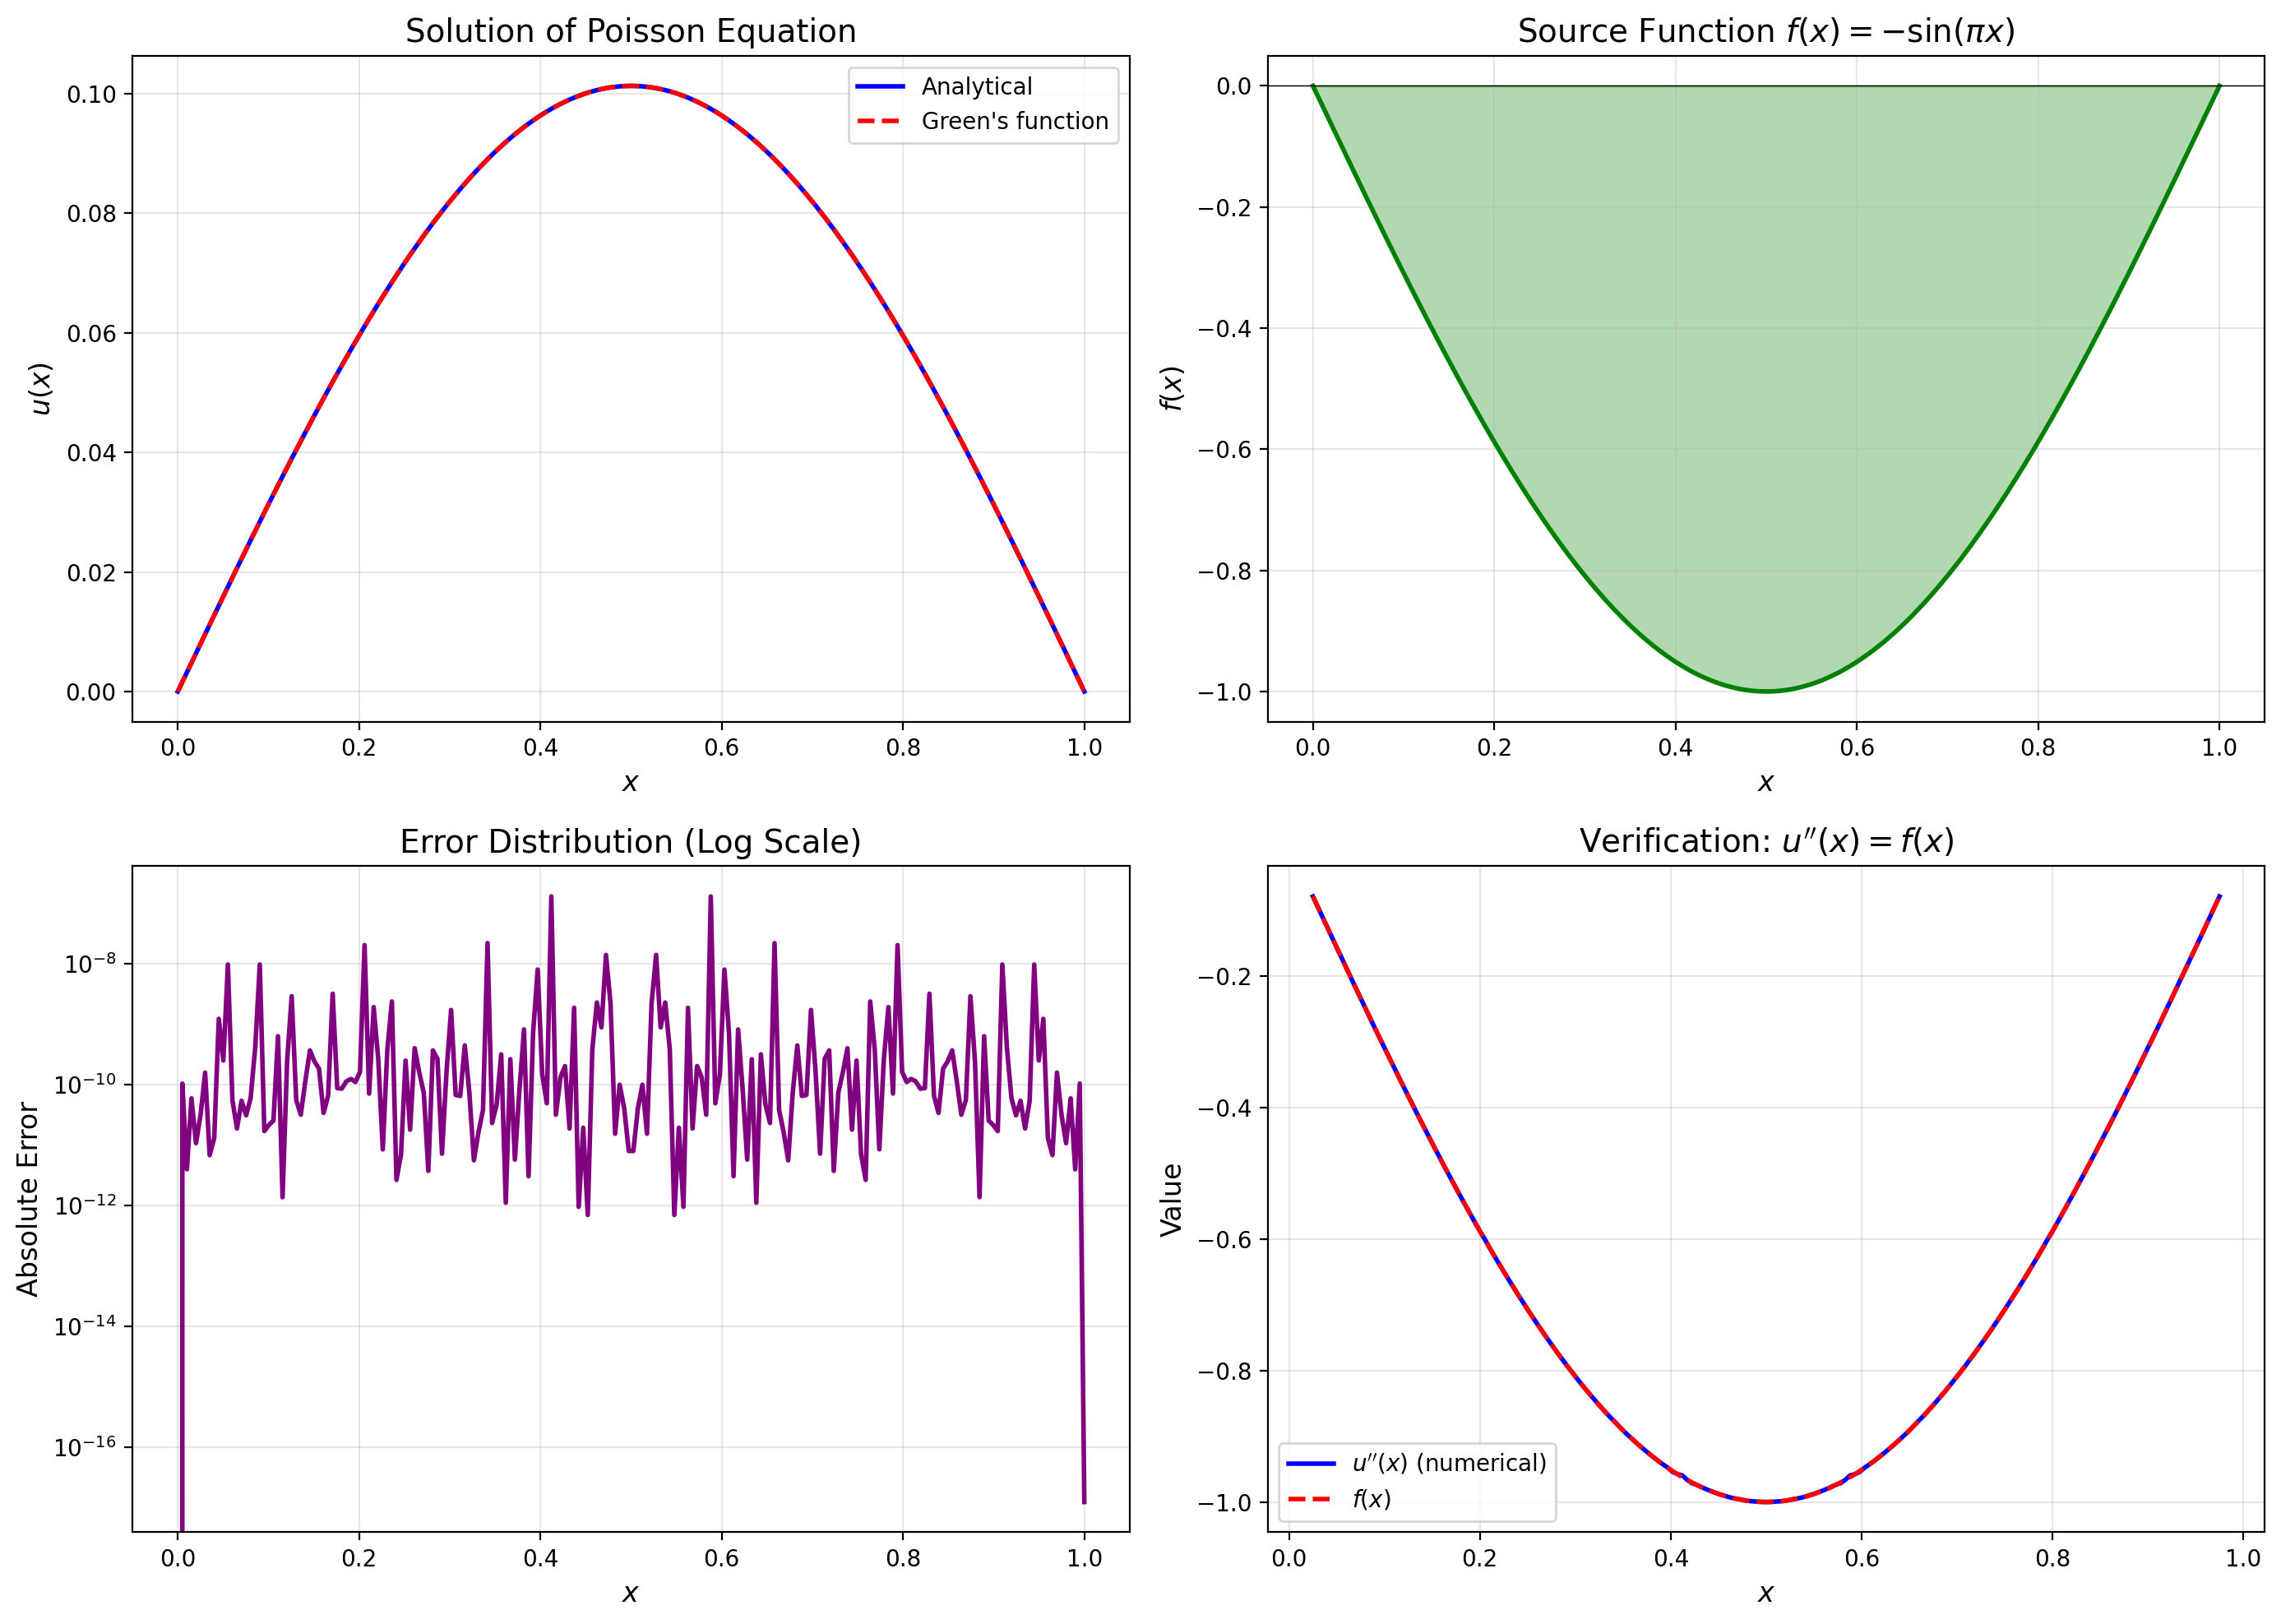


Figure saved to 'plot.png'


In [4]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top left: Solutions comparison
ax1 = axes[0, 0]
ax1.plot(x, u_analytical, 'b-', linewidth=2, label='Analytical')
ax1.plot(x, u_numerical, 'r--', linewidth=2, label="Green's function")
ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('$u(x)$', fontsize=12)
ax1.set_title('Solution of Poisson Equation', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Top right: Source function
ax2 = axes[0, 1]
f_values = source_function(x)
ax2.plot(x, f_values, 'g-', linewidth=2)
ax2.fill_between(x, f_values, alpha=0.3, color='green')
ax2.set_xlabel('$x$', fontsize=12)
ax2.set_ylabel('$f(x)$', fontsize=12)
ax2.set_title('Source Function $f(x) = -\\sin(\\pi x)$', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='k', linewidth=0.5)

# Bottom left: Error distribution
ax3 = axes[1, 0]
ax3.semilogy(x, error, 'purple', linewidth=2)
ax3.set_xlabel('$x$', fontsize=12)
ax3.set_ylabel('Absolute Error', fontsize=12)
ax3.set_title('Error Distribution (Log Scale)', fontsize=14)
ax3.grid(True, alpha=0.3)

# Bottom right: Verification of second derivative
ax4 = axes[1, 1]
# Compute numerical second derivative using finite differences
dx = x[1] - x[0]
d2u_numerical = np.gradient(np.gradient(u_numerical, dx), dx)
ax4.plot(x[5:-5], d2u_numerical[5:-5], 'b-', linewidth=2, label="$u''(x)$ (numerical)")
ax4.plot(x[5:-5], f_values[5:-5], 'r--', linewidth=2, label='$f(x)$')
ax4.set_xlabel('$x$', fontsize=12)
ax4.set_ylabel('Value', fontsize=12)
ax4.set_title("Verification: $u''(x) = f(x)$", fontsize=14)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('greens_function_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to 'plot.png'")

## Properties of Green's Functions

### 1. Symmetry (Reciprocity)

For self-adjoint operators with appropriate boundary conditions:

$$G(x, x') = G(x', x)$$

This reflects the physical principle of reciprocity.

### 2. Singularity Structure

The Green's function has a singularity at $x = x'$. For the Laplacian in different dimensions:

- **1D**: $G \sim |x - x'|$
- **2D**: $G \sim \ln|\mathbf{r} - \mathbf{r}'|$
- **3D**: $G \sim \frac{1}{|\mathbf{r} - \mathbf{r}'|}$

### 3. Spectral Representation

If $\{\phi_n\}$ are eigenfunctions of $\mathcal{L}$ with eigenvalues $\{\lambda_n\}$:

$$G(x, x') = \sum_n \frac{\phi_n(x) \phi_n^*(x')}{\lambda_n}$$

This representation connects Green's functions to spectral theory.

## Extended Example: Time-Dependent Green's Function

For the heat equation:

$$\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}$$

The Green's function (heat kernel) on an infinite domain is:

$$G(x, t; x', t') = \frac{1}{\sqrt{4\pi\alpha(t-t')}} \exp\left( -\frac{(x-x')^2}{4\alpha(t-t')} \right)$$

This Gaussian spreading describes diffusive transport.

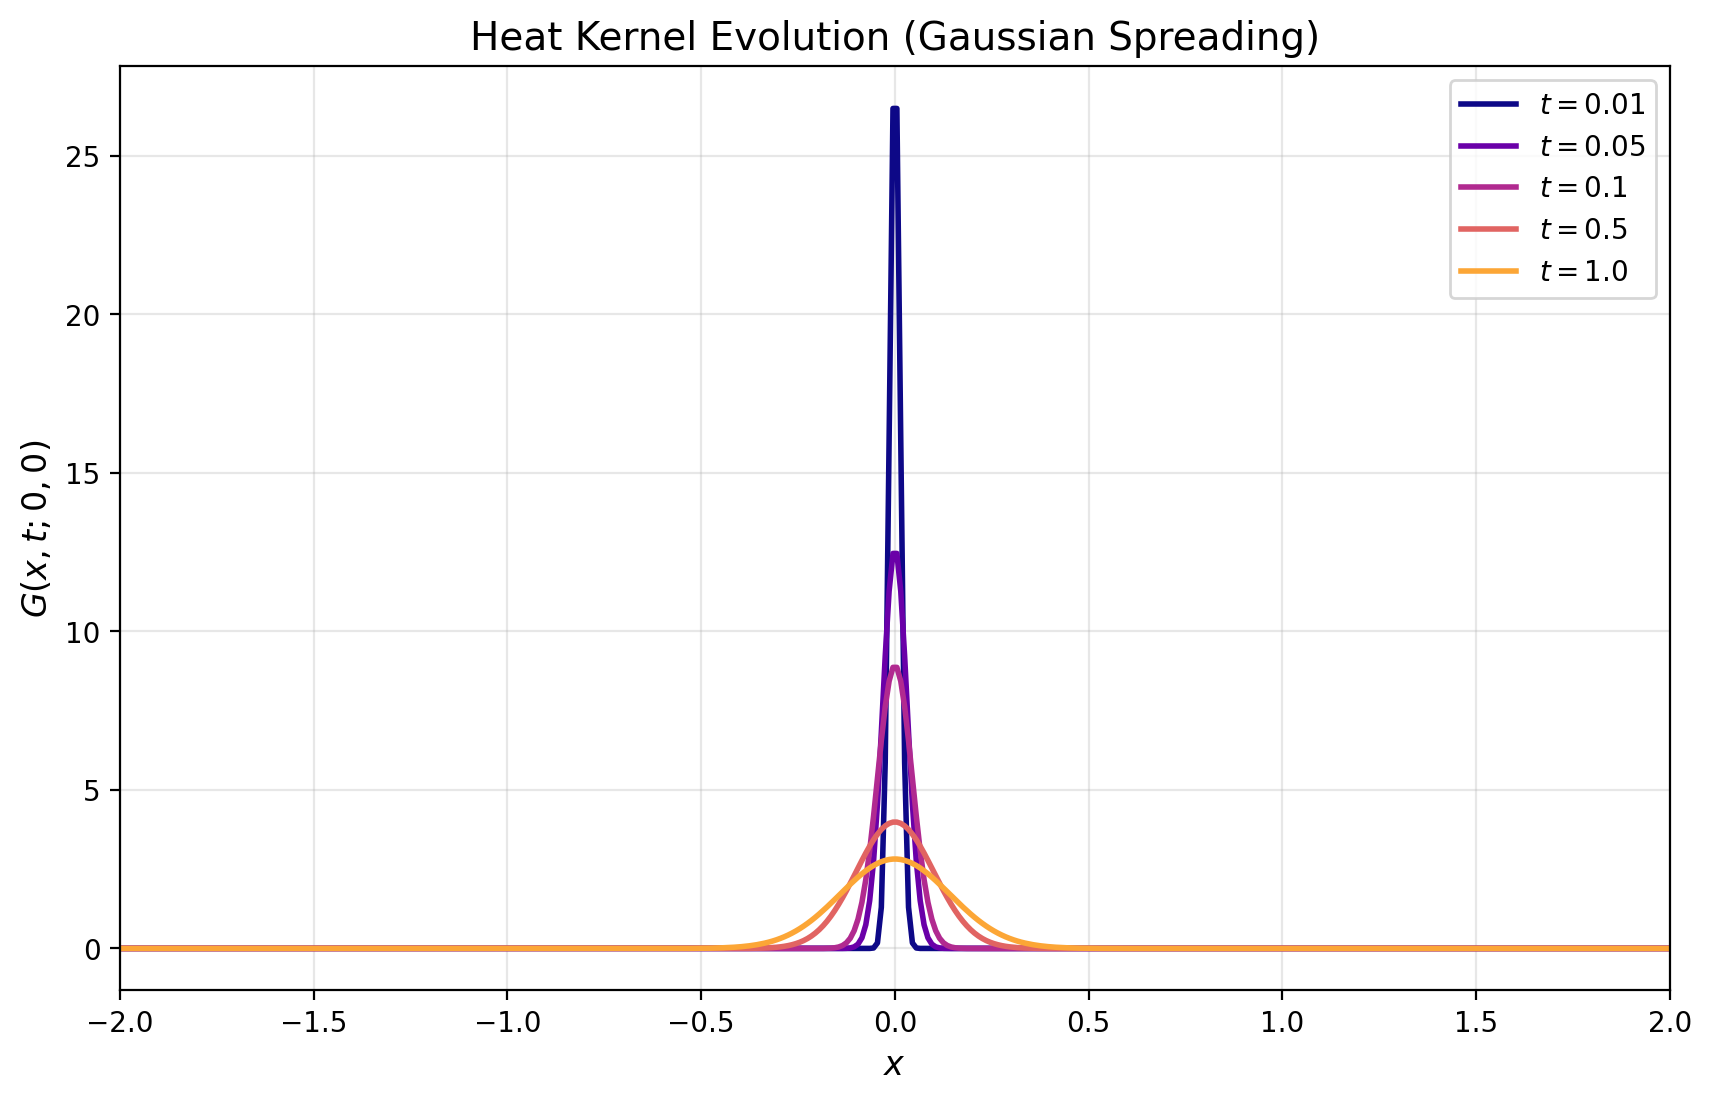

t = 0.01: ∫G dx = 1.000000
t = 0.05: ∫G dx = 1.000000
t = 0.1: ∫G dx = 1.000000
t = 0.5: ∫G dx = 1.000000
t = 1.0: ∫G dx = 1.000000


In [5]:
def heat_kernel(x, t, xp, alpha):
    """
    Heat kernel (Green's function for the heat equation).
    
    Parameters:
    -----------
    x : array
        Spatial coordinate
    t : float
        Time (must be > 0)
    xp : float
        Initial source position
    alpha : float
        Thermal diffusivity
    """
    if t <= 0:
        raise ValueError("Time must be positive")
    return np.exp(-(x - xp)**2 / (4 * alpha * t)) / np.sqrt(4 * np.pi * alpha * t)

# Parameters
alpha = 0.01  # Thermal diffusivity
xp = 0.0      # Source position
x_heat = np.linspace(-2, 2, 400)
times = [0.01, 0.05, 0.1, 0.5, 1.0]

# Plot evolution
plt.figure(figsize=(10, 6))
colors = plt.cm.plasma(np.linspace(0, 0.8, len(times)))

for t, color in zip(times, colors):
    G_heat = heat_kernel(x_heat, t, xp, alpha)
    plt.plot(x_heat, G_heat, color=color, linewidth=2, label=f'$t = {t}$')

plt.xlabel('$x$', fontsize=12)
plt.ylabel('$G(x, t; 0, 0)$', fontsize=12)
plt.title('Heat Kernel Evolution (Gaussian Spreading)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim([-2, 2])
plt.show()

# Verify normalization (should integrate to 1)
from scipy.integrate import simpson
for t in times:
    G = heat_kernel(x_heat, t, xp, alpha)
    integral = simpson(G, x=x_heat)
    print(f"t = {t}: ∫G dx = {integral:.6f}")

## Conclusion

Green's functions provide a powerful and elegant framework for solving linear differential equations. Key takeaways:

1. **Physical intuition**: Green's functions represent the response to impulse sources
2. **Superposition principle**: Complex sources decompose into integrals over impulses
3. **Boundary conditions**: The Green's function encodes the boundary conditions of the problem
4. **Universality**: The same formalism applies across physics, engineering, and applied mathematics

### Further Reading

- Arfken, G.B. & Weber, H.J. *Mathematical Methods for Physicists*
- Stakgold, I. & Holst, M. *Green's Functions and Boundary Value Problems*
- Economou, E.N. *Green's Functions in Quantum Physics*